## A Digital Tool for Liquid-Liquid Extraction Process Design

This is a repository to support the publication "A Digital Tool for Liquid-Liquid Extraction Process Design"

Below is a worked example for the code shared in this repository.

Use the "LLE_Digital_Tool_requirements.txt" file to create your virtual environment using Python 3.9.7 or above.

Sections:

1. [Procedural Processing](#Processing)

Setting system and compounds dictionary objects. Loading solvents and compounds' physical properties data. Use of functions to get the data for each compound.

2. [Visualisations](#Visualisations)

Visualising speciation curves, fraction extracted, and extraction efficiency in each phase (aqueous or organic).

3. [Results](#Results)

Generate results in tabulated form using defined functions.

### Processing

The functions definitions can be found in the LLEFunctions.py file. Here is an example of their use.

First, let's load the data required:

In [52]:
# Define dat objects using helper function
solvents, functional_groups, pred_pka, pivoted_solvents, structures = load_local_data()

Then, we need to define the system and compound dictionary objects:

In [37]:
system_panel_values = {
  "Aqueous Phase": 25,
  "Organic Phase": 25,
  "Total Volume": 50,
  "Aqueous Phase Proportion": 50,
  "Organic Phase Proportion": 50,
  "Relative Phase Volume": 1,
  "Extraction (Aqueous Phase) pH": 7,
  "Extraction Phase": "Aqueous",
  "Current Solvent": "2-MeTHF",
  "Number of compounds to separate": 2
}

compounds_panel_values = {
  "c0": {
    "Name": "PRODUCT 3",
    "Isolate": True,
    "Impurity": False,
    },
  "c1": {
    "Name": "AMINE 2",
    "Isolate": False,
    "Impurity": True,
    },
  "c2": {
    "Name": "ARYL BROMIDE 1",
    "Isolate": False,
    "Impurity": True,
    }
}

Now let's use the appropriate functions to get the data into the compounds dictionary object

In [41]:
for compound in compounds_panel_values.values():
    try:
        name = compound.get('Name').lower().title()  # get name to search for PPP data
        compound = RetrieveCompoundPhysChem(compound, pred_pka)  # add physchem data for compound to dictionary
        compound = RetrieveSmilesToMol(compound, structures)  # add mol data to dictionary
        compound['Vr'] = system_panel_values['Relative Phase Volume']
        logp_value = pivoted_solvents.loc[system_panel_values['Current Solvent'], name]
        compound['Kp'] = 10 ** logp_value
        compound['validity'] = True
    except:  # if any of the above fails, compound and system will not be valid
        compound['validity'] = False
        system_panel_values['Check'] = False

Let's call the object to make sure the necessary data have been added to each compound:

In [53]:
# check that it worked
compounds_panel_values

{'c0': {'Name': 'PRODUCT 3',
  'Isolate': True,
  'Impurity': False,
  'pka_data': True,
  'Forms': ['Product 3 (q= +3)',
   'Product 3 (q= +2)',
   'Product 3 (q= +1)',
   'Product 3 (neutral form)'],
  'pka_values': [4.0, 7.81, 9.24],
  'Kas': [0.0001, 1.5488166189124828e-08, 5.754399373371567e-10],
  'Neutral Form': 4,
  'Extraction': 'Extraction of Product 3 [Form 4]',
  'Structure': <rdkit.Chem.rdchem.Mol at 0x1ddde8cdbe0>,
  'Vr': 5.0,
  'Kp': 91754.88389387833,
  'validity': True},
 'c1': {'Name': 'AMINE 2',
  'Isolate': False,
  'Impurity': True,
  'pka_data': True,
  'Forms': ['Amine 2 (q= +2)', 'Amine 2 (q= +1)', 'Amine 2 (neutral form)'],
  'pka_values': [4.35, 9.27],
  'Kas': [4.466835921509635e-05, 5.370317963702532e-10],
  'Neutral Form': 3,
  'Extraction': 'Extraction of Amine 2 [Form 3]',
  'Structure': <rdkit.Chem.rdchem.Mol at 0x1ddde8cdee0>,
  'Vr': 5.0,
  'Kp': 0.4776670563746566,
  'validity': True},
 'c2': {'Name': 'ARYL BROMIDE 1',
  'Isolate': False,
  'Impurity

### Visualisations

We can loop over the compounds dictionary object to visualise Ionic form fractions (speciation) and fraction extracted for each compound, as well as the extraction efficiency in the defined phase (currently set to "Aqueous").

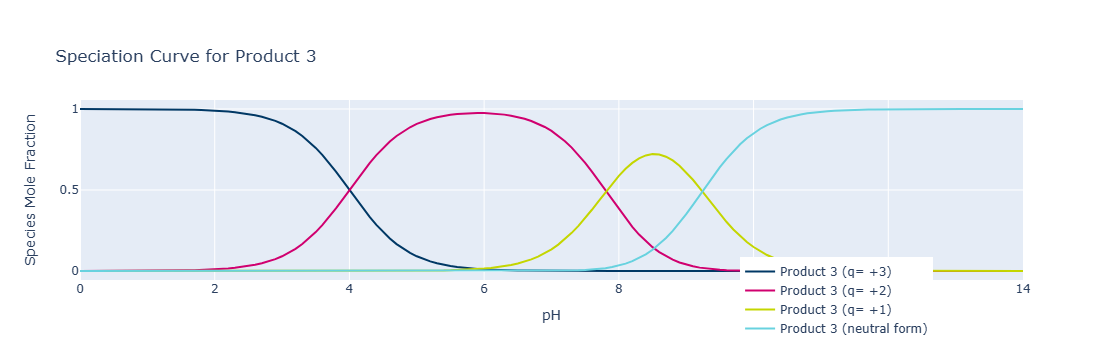

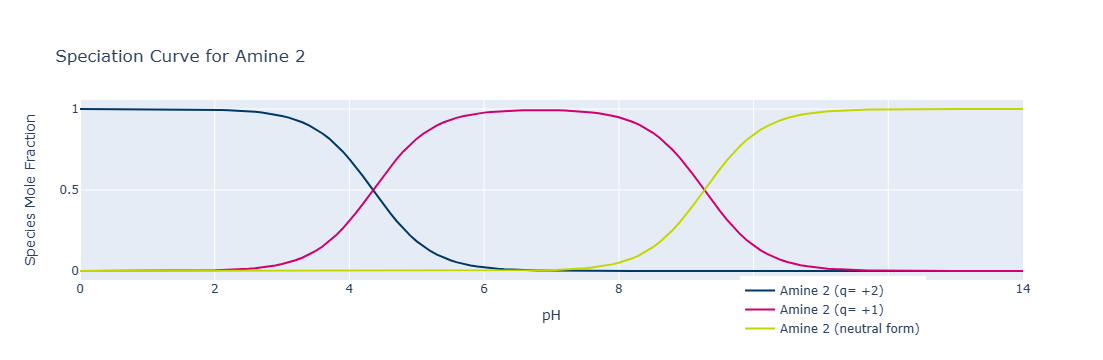

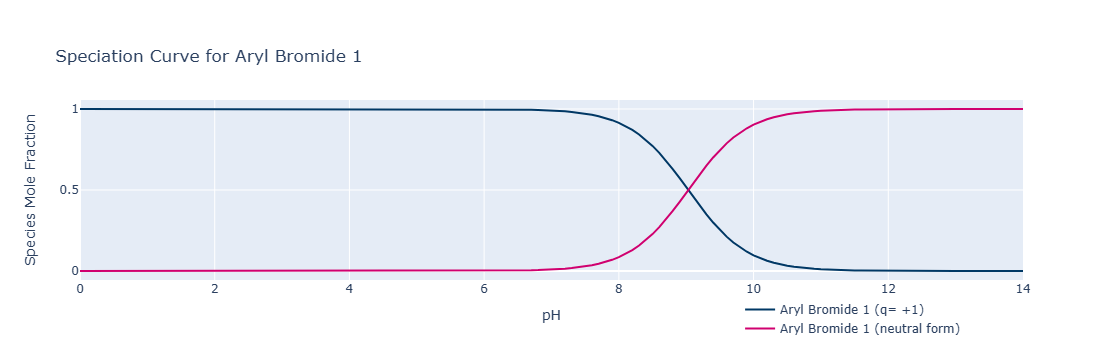

In [54]:
# generate speciation curves
for compound in compounds_panel_values.values():
    if compound.get('Isolate'):
        fig_1 = PlotSpecies(compound)
        display(fig_1)

    elif compound.get('Impurity'):
        fig_1 = PlotSpecies(compound)
        display(fig_1)

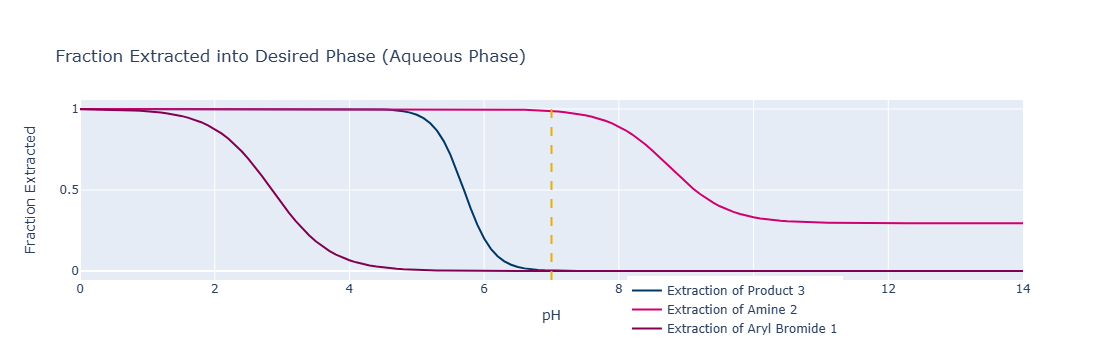

In [55]:
# generate and plot fraction extracted curves
fig2 = PlotFractionExtracted(compounds_panel_values, system_panel_values)
display(fig2)

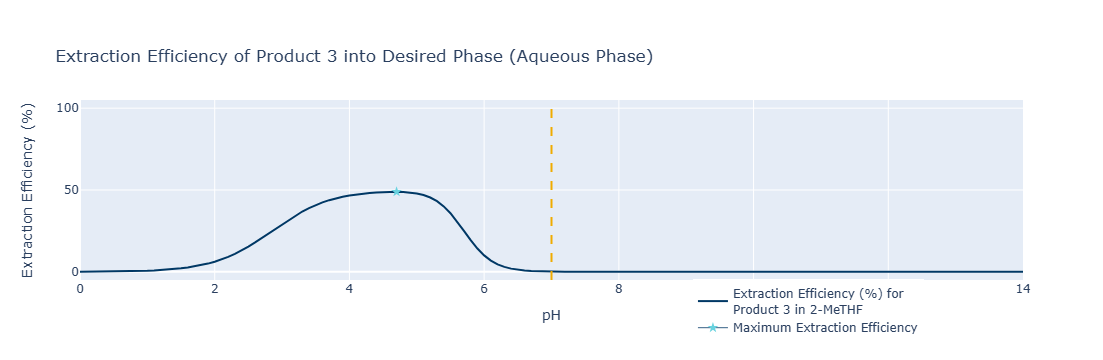

In [56]:
# generate and plot extraction efficiency
fig3 = PlotExtractionEfficiency(compounds_panel_values, system_panel_values)
display(fig3)

If you want to visualise the fraction extracted or the extraction efficiency in the organic phase, setting the appropriate key in the system dictionary is necessary, and can be done as follows:

In [59]:
system_panel_values['Extraction Phase'] = "Organic"

Now we can use the same functions for the visualisation:

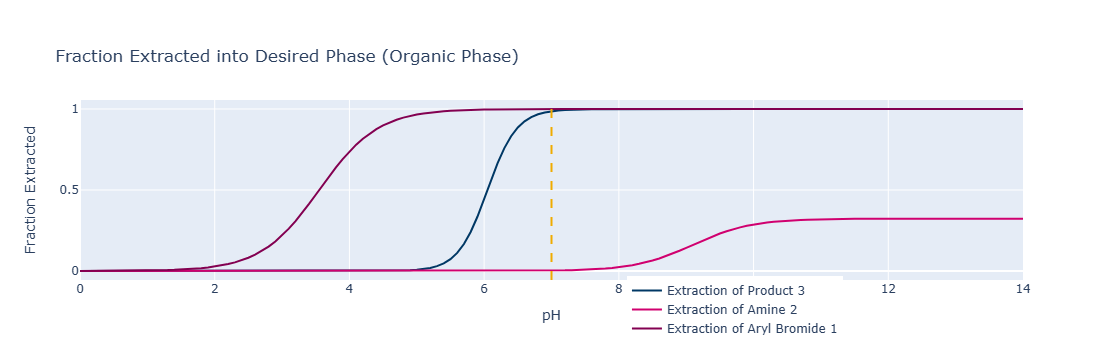

In [60]:
# generate and plot fraction extracted curves
fig2 = PlotFractionExtracted(compounds_panel_values, system_panel_values)
display(fig2)

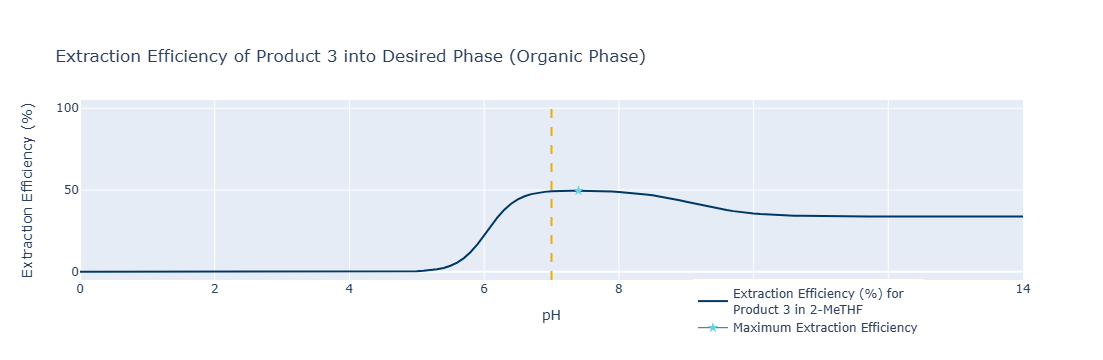

In [63]:
# generate and plot extraction efficiency
fig3 = PlotExtractionEfficiency(compounds_panel_values, system_panel_values)
display(fig3)

### Results

If you would like to generate the results in tabular form you can use the following method

In [57]:
# Calculate extractions
_, results = CalculateExhaustiveExtractions(solvents, compounds_panel_values, system_panel_values)

In [58]:
results.head()

,pH,Solvent,Product 3_logP,Amine 2_logP,Aryl Bromide 1_logP,Extraction_eff_Product 3_aq,Fraction_extracted_Product 3_aq,Fraction_extracted_Amine 2_aq,Fraction_extracted_Aryl Bromide 1_aq,Volume_ratio
0,0.0,"1,1,1-Trichloroethane",6.083062,-0.705796,6.639175,0.202480,1.0,1.0,0.995950,1.0
1,0.1,"1,1,1-Trichloroethane",6.083062,-0.705796,6.639175,0.254640,1.0,1.0,0.994907,1.0
2,0.2,"1,1,1-Trichloroethane",6.083062,-0.705796,6.639175,0.320151,1.0,1.0,0.993597,1.0
3,0.3,"1,1,1-Trichloroethane",6.083062,-0.705796,6.639175,0.402379,1.0,1.0,0.991952,1.0
4,0.4,"1,1,1-Trichloroethane",6.083062,-0.705796,6.639175,0.505512,1.0,1.0,0.989890,1.0


In [48]:
results.shape

(24252, 10)

In [49]:
# The same can be done looking at different volume ratios and calculating maximum extraction efficiency at each volume ratio:
# Define Valume Ratio limits
volume_ratios = (0.1, 5.0)

_, vr_results = CalculateExtractions(solvents, compounds_panel_values, system_panel_values, volume_ratios)

In [50]:
vr_results.head()

,Product 3_logP,Amine 2_logP,Aryl Bromide 1_logP,Max_eff_pH,Max_ext_eff,PRODUCT 3_fraction_org,AMINE 2_fraction_org,ARYL BROMIDE 1_fraction_org,Volume_ratio
"1,1,1-Trichloroethane",6.083062,-0.705796,6.639175,5.0,48.326346,0.990299,8.638695e-07,0.975994,0.1
"1,1-Dichloroethane",6.417474,-0.202966,6.693888,4.9,48.044607,0.987121,2.085380e-06,0.973427,0.1
"1,1-Dichloroethene",6.544878,-0.476505,7.012580,4.8,48.666290,0.989383,8.348416e-07,0.983769,0.1
"1,2-Dichlorobenzene",5.912347,-0.879814,6.725937,5.1,48.692852,0.989438,7.569705e-07,0.984252,0.1
"1,2-Dichloroethane",6.303173,-0.180649,6.589213,5.0,47.878858,0.983998,2.894641e-06,0.973146,0.1
